Sensitivity analysis.ipynb


# Data

In [1]:
import data_preparation
import custom_func
import model
import model_analysis

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import data
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
current_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current', header=0).copy()
current_input_param = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current input param', header=0).copy()


potential_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
potential_station_data = potential_station_data.iloc[[0, 4,7, 10, 11, 18]] # if we want to keep current facility setup in the set of proposed facilities
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

## Data Extraction

In [3]:
coordinates_st = custom_func.extract_station_coordinate(current_station_data)
current_st_coord = pd.DataFrame(coordinates_st[1]).T.reset_index().set_index('index')
current_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(current_st_coord)


coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']
display(spill_coord)

,St_Latitude,St_Longitude
index,,
s6,60.758053,-115.789886
s9,58.550838,-93.623520
s200,69.459000,-132.974304
s300,63.742886,-68.464958


,St_Latitude,St_Longitude
index,,
o74,64.504219,-79.406021
o98,73.858727,-77.062927
o53,58.851135,-94.206932
o178,69.455536,-123.856422
o203,65.388885,-65.952179
...,...,...
o207,61.278797,-114.416603
o43,70.589783,-120.206131
o192,68.705536,-134.233826


## Common input parameters

In [4]:
BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
QuantityMin = 2

# Model Configuration 3 (Current facility location)


## Input parameters

In [5]:
current_vs_proposed = 'current'
NumberStMax_m3 = 6
DistanceMax = 10

In [6]:
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(current_station_data, spill_data, current_input_param)

#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

['s6', 's9', 's200', 's300']


## Run the model

In [8]:
# Modeling based on current setup
model_03, select_m3, deploy_m3, mvars_m3, names_m3, values_m3, objValues, \
        spill_df_m3, station_df_m3, cover_1s_m3, select_1s_m3, deploy_1s_m3, MeanResponseTime_m3, coverage_percentage_m3, assignment_m3  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m3, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
cover
{('o53', 's9'): <gurobi.Var *Awaiting Model Update*>, ('o178', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o7', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o221', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's9'): <gurobi.Var *Awaiting Model Update*>, ('o25', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o94', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o208', 's6'): <gurobi.Var *Awaiting Model Update*>, ('o86', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o93', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o6', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o10', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o169', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o185', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o87', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o24', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o190', 's9'): <gurobi.Var *A

## Network diagram of current facility

In [10]:
current_vs_proposed = 'current'

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o178,s200,69.459000,-132.974304,69.455536,-123.856422,c,110.0,9.117882
1,o221,s200,69.459000,-132.974304,68.962257,-136.552292,i,157.0,3.612305
2,o25,s200,69.459000,-132.974304,69.626266,-138.875046,c,31.0,5.903112
3,o169,s200,69.459000,-132.974304,70.624878,-124.072258,i,37.0,8.978068
4,o185,s200,69.459000,-132.974304,69.951424,-132.673172,i,157.0,0.577202
5,o24,s200,69.459000,-132.974304,71.026360,-127.767967,i,7.0,5.437146
6,o175,s200,69.459000,-132.974304,69.407196,-123.965919,i,37.0,9.008534
7,o28,s200,69.459000,-132.974304,69.807663,-140.962463,c,31.0,7.995765
8,o27,s200,69.459000,-132.974304,69.721138,-139.684113,c,31.0,6.714927
9,o219,s200,69.459000,-132.974304,69.517181,-138.171616,i,7.0,5.197637


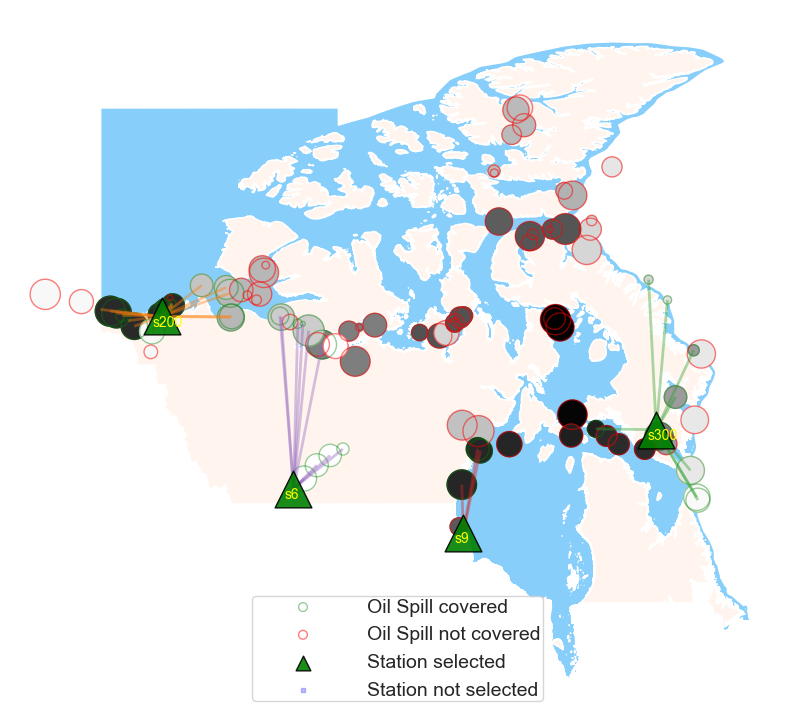

In [9]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m3, Sensitivity_R, spill_df_m3, station_df_m3, MeanResponseTime_m3, coverage_percentage_m3, assignment_m3, deploy_1s_m3, select_1s_m3, current_vs_proposed)

# Model Configuration 4 (Proposed 5 facility location)

## Input param

In [11]:
NumberStMax_m4 = 5
current_vs_proposed = 'proposed'

In [12]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(potential_st_coord)

,St_Latitude,St_Longitude
index,,
s1,70.000000,-134.000000
s5,60.529999,-114.379997
s8,60.060001,-95.889999
s11,62.669998,-92.708000
s12,73.400002,-88.160004
s19,63.150002,-69.680000


In [13]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

['s1', 's5', 's8', 's11', 's12', 's19']


In [14]:
# Model
model_04, select_m4, deploy_m4, mvars_m4, names_m4, values_m4, objValues_m4, \
        spill_df_m4, station_df_m4, cover_1s_m4, select_1s_m4, deploy_1s_m4, MeanResponseTime_m4, coverage_percentage_m4, assignment_m4  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
cover
{('o74', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o127', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o51', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o7', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o30', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o221', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o25', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o94', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o119', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o148', 's5'): <gurobi.Var *Awaiting Model Update*>, ('o208', 's5'): <gurobi.Var *Awaiting Model Update*>, ('o86', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o93', 's19'): <gurobi.Var *Awaiting Model Upd

## Fig8(b) Network diagram of proposed 5 facility

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


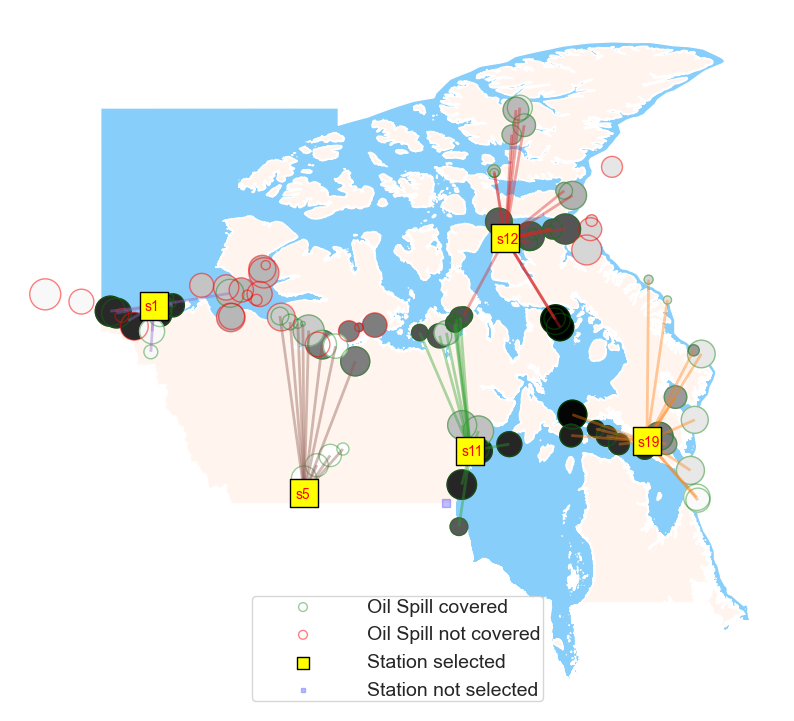

In [15]:
# Draw the network
assignment_line = model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m4, Sensitivity_R, spill_df_m4, station_df_m4, MeanResponseTime_m4, coverage_percentage_m4, assignment_m4, deploy_1s_m4, select_1s_m4, current_vs_proposed)

# Compare Model 3 & 4

In [16]:
assignment_line_m3 = pd.DataFrame(columns=list(assignment_m3.columns.values))
for i, o in enumerate(assignment_m3['Spill #'].unique()):
    minD = min(assignment_m3.loc[assignment_m3['Spill #'] == o]['Distance'])
    df = assignment_m3.iloc[np.where(assignment_m3['Distance'] == minD)[0]]
    assignment_line_m3 = pd.concat([assignment_line_m3, df])

resource_allocation_m3 = assignment_line_m3[['Station no.', 'Resource Type', 'Quantity deployed']]
resource_allocation_m3 = resource_allocation_m3.sort_values(by=['Station no.'])
resource_allocation_m3 = resource_allocation_m3.groupby(['Station no.', 'Resource Type'])['Quantity deployed'].mean().reset_index()
resource_allocation_m3['Facility'] = 'Current'
resource_allocation_m3

,Station no.,Resource Type,Quantity deployed,Facility
0,s200,c,34.857143,Current
1,s200,i,61.000000,Current
2,s300,c,57.333333,Current
3,s300,i,67.000000,Current
4,s6,c,13.666667,Current
5,s6,i,79.857143,Current
6,s9,c,31.000000,Current
7,s9,i,22.000000,Current


In [17]:
assignment_line_m4 = pd.DataFrame(columns=list(assignment_m4.columns.values))
for i, o in enumerate(assignment_m4['Spill #'].unique()):
    minD = min(assignment_m4.loc[assignment_m4['Spill #'] == o]['Distance'])
    df = assignment_m4.iloc[np.where(assignment_m4['Distance'] == minD)[0]]
    assignment_line_m4 = pd.concat([assignment_line_m4, df])

resource_allocation_m4 = assignment_line_m4[['Station no.', 'Resource Type', 'Quantity deployed']]
resource_allocation_m4 = resource_allocation_m4.sort_values(by=['Station no.'])
resource_allocation_m4 = resource_allocation_m4.groupby(['Station no.', 'Resource Type'])['Quantity deployed'].mean().reset_index()
resource_allocation_m4['Facility'] = 'Proposed'
resource_allocation_m4

,Station no.,Resource Type,Quantity deployed,Facility
0,s1,c,70.500000,Proposed
1,s1,i,17.000000,Proposed
2,s11,c,48.666667,Proposed
3,s11,i,67.000000,Proposed
4,s11,m,31.000000,Proposed
5,s12,c,44.250000,Proposed
6,s12,i,55.750000,Proposed
7,s12,m,51.000000,Proposed
8,s19,c,46.142857,Proposed
9,s19,i,27.000000,Proposed


## Fig7a barplot - quantity stockplie
Produced in Excel file +++

In [ ]:
resource_allocation = pd.concat([resource_allocation_m3, resource_allocation_m4])
resource_allocation

In [ ]:
plt.bar(data=resource_allocation,
        x="Station no.", height="Quantity deployed",
        alpha = 0.5,
        )
#plt.legend(loc='upper right')

In [ ]:
resource_allocation.to_csv('Outputs/resource_allocation.csv')

In [ ]:
fig_barplot = plt.figure()
plt.bar(data=resource_allocation,
        x="Station no.", height="Quantity deployed",
        alpha = 0.5,
        )

plt.show()
fig_barplot.savefig('Outputs/barplot_compare.png', transparent=False, dpi= 600)


In [ ]:
import seaborn as sns
%matplotlib inline
resource_allocation_df = pd.read_csv('Outputs/resource_allocation.csv', index_col='Station no.')
resource_allocation_df

In [ ]:
fig10c = plt.subplots(figsize=(7,3.5))
ax = sns.barplot(data=resource_allocation,
                 x="Station no.", y="Quantity deployed", errorbar=None,
                 hue='Facility', palette=["g", "yellow"],
                 alpha=0.7)
sns.set_style(style='white')
ax.grid(False)
plt.savefig('Outputs/barplot_compareHatch.png', transparent=True)

In [ ]:
fig10c = plt.subplots(figsize=(7,3.5))
ax = sns.barplot(data=resource_allocation,
                 x="Station no.", y="Quantity deployed", errorbar=None,
                 hue='Facility', palette=["g", "yellow"],
                 alpha=0.7)
hatches = ['', '', '', '', '', 'o','o', 'o','','','', '', '', '', '', 'o','o', 'o']
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
sns.set_style(style='white')
ax.grid(False)
plt.savefig('Outputs/barplot_compareHatch.png', transparent=True)

# Model Configuration 4(b)

## Input param

In [32]:
potential_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()

In [33]:
NumberStMax_m4b = 5
current_vs_proposed = 'proposed'

In [34]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(potential_st_coord)

,St_Latitude,St_Longitude
index,,
s1,70.000000,-134.000000
s2,70.639999,-119.430000
s3,67.089996,-112.320000
s4,62.599998,-113.190002
s5,60.529999,-114.379997
s6,68.860001,-103.190002
s7,63.930000,-101.139999
s8,60.060001,-95.889999
s9,75.110001,-95.709999


In [35]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


In [36]:
# Model
model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
        spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
cover
{('o74', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's14'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's18'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's7'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's10'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o178', 's2'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's18'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's19'): <gurobi.Var *Awaiting Model U

## Fig8(b) Network diagram of proposed 5 facility

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


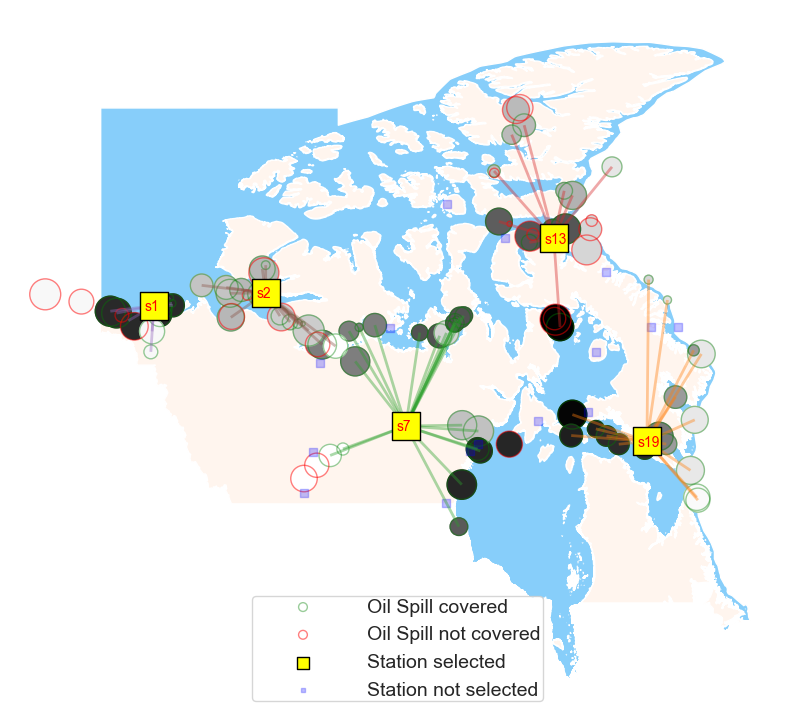

In [37]:
# Draw the network
assignment_line_m4b = model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m4b, Sensitivity_R, spill_df_m4b, station_df_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b, deploy_1s_m4b, select_1s_m4b, current_vs_proposed)

In [ ]:
input_output_df_m4b = pd.DataFrame(index=range(1), columns=['Max no of stations', 'Max distance (kms)','Objective 1', 'Objective 2', 'Coverage Percentage', 'Mean Response Time'])
input_output_df_m4b.iloc[0,0] = NumberStMax_m4b
input_output_df_m4b.iloc[0,1] = DistanceMax
input_output_df_m4b.iloc[0,2] = objValues_m4b[0::2]
input_output_df_m4b.iloc[0,3] = objValues_m4b[1::2]
input_output_df_m4b.iloc[0,4] = coverage_percentage_m4b
input_output_df_m4b.iloc[0,5] = MeanResponseTime_m4b
input_output_df_m4b

# Model Configuration 5 (Proposed 6 facility location)

## Data

In [24]:
NumberStMax_m5 = 6

In [26]:
potential_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()

In [27]:
current_vs_proposed = 'proposed'

In [28]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(potential_st_coord)
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))


,St_Latitude,St_Longitude
index,,
s1,70.000000,-134.000000
s2,70.639999,-119.430000
s3,67.089996,-112.320000
s4,62.599998,-113.190002
s5,60.529999,-114.379997
s6,68.860001,-103.190002
s7,63.930000,-101.139999
s8,60.060001,-95.889999
s9,75.110001,-95.709999


['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


## Run Model 5

In [29]:
DistanceMax = 10

In [30]:
# Model
model_05, select_m5, deploy_m5, mvars_m5, names_m5, values_m5, objValues_m5, \
        spill_df_m5, station_df_m5, cover_1s_m5, select_1s_m5, deploy_1s_m5, MeanResponseTime_m5, coverage_percentage_m5, assignment_m5  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m5, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
cover
{('o74', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's14'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's18'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's7'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's10'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o178', 's2'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's18'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's19'): <gurobi.Var *Awaiting Model U

## Network diagram of proposed 6 facility

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


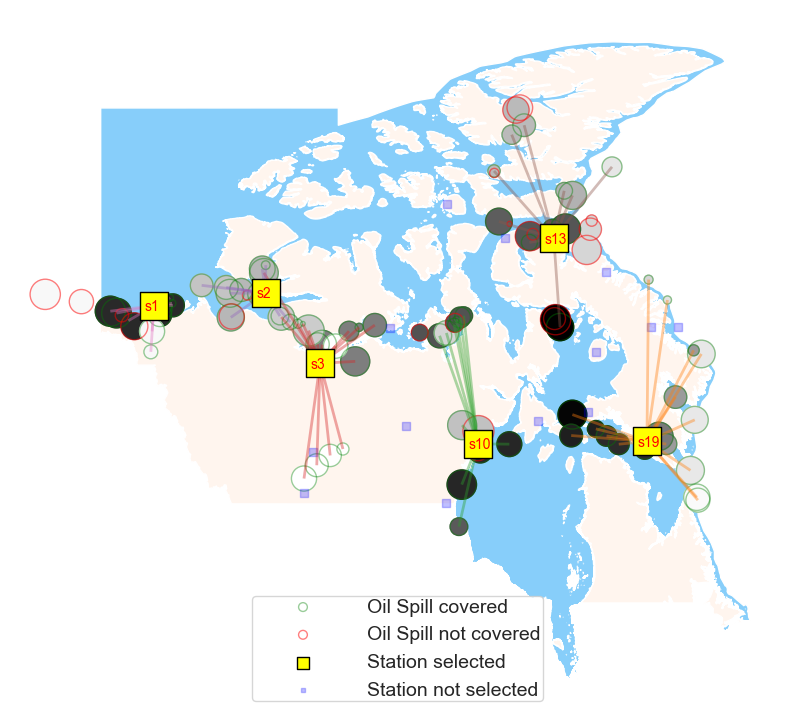

In [31]:
# Draw the network
assignment_line_m5 = model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m5, Sensitivity_R, spill_df_m5, station_df_m5, MeanResponseTime_m5, coverage_percentage_m5, assignment_m5, deploy_1s_m5, select_1s_m5, current_vs_proposed)